In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('/Users/d/Documents/FUN/DATA/Pokemon.csv',index_col=0)

In [4]:
type_colors = [
    "#8ED752", "#F95643", "#53AFFE", "#C3D221", "#BBBDAF",
    "#AD5CA2", "#F8E64E", "#F0CA42", "#F9AEFE", "#A35449",
    "#FB61B4", "#CDBD72", "#7673DA", "#66EBFF", "#8B76FF",
    "#8E6856", "#C3C1D7", "#75A4F9"]
pokemon_types = df['Type 1'].unique()
pokemon_colors = dict(zip(pokemon_types, type_colors))

In [5]:
# df.columns = df.columns.str.upper().str.replace('_', '') #change into upper case

In [6]:
df['Power'] = df['Attack'] + df['Defense']
df['Overall'] = df['Power'] + df['Speed'] + df['HP']
df['Total'] = df['Overall'] + df['Sp. Atk'] + df['Sp. Def']

In [7]:
df.head(13)

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Power,Overall,Total
#,,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,98,188,318
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,125,245,405
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,165,325,525
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,223,383,625
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,95,199,309
6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False,122,260,405
7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False,162,340,534
8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False,241,419,634
9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False,182,360,634


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 800
Data columns (total 14 columns):
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
Power         800 non-null int64
Overall       800 non-null int64
Total         800 non-null int64
dtypes: bool(1), int64(10), object(3)
memory usage: 88.3+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
HP,800.0,69.25875,25.534669,1.0,50.00,65.0,80.00,255.0
Attack,800.0,79.00125,32.457366,5.0,55.00,75.0,100.00,190.0
Defense,800.0,73.84250,31.183501,5.0,50.00,70.0,90.00,230.0
Sp. Atk,800.0,72.82000,32.722294,10.0,49.75,65.0,95.00,194.0
Sp. Def,800.0,71.90250,27.828916,20.0,50.00,70.0,90.00,230.0
Speed,800.0,68.27750,29.060474,5.0,45.00,65.0,90.00,180.0
Generation,800.0,3.32375,1.661290,1.0,2.00,3.0,5.00,6.0
Power,800.0,152.84375,53.980661,10.0,112.00,150.0,188.25,370.0
Overall,800.0,290.38000,80.623202,118.0,224.50,293.0,350.00,530.0
Total,800.0,435.10250,119.963040,180.0,330.00,450.0,515.00,780.0


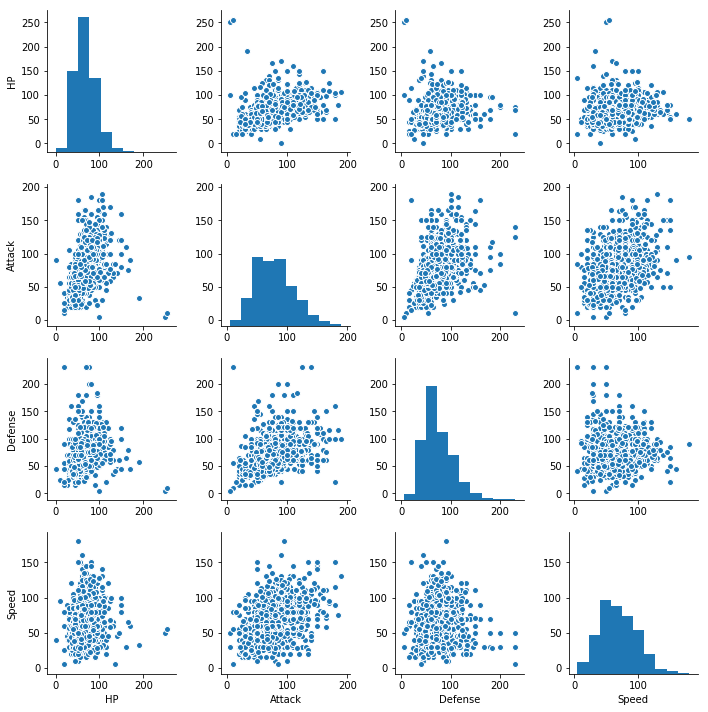

In [10]:
plot = sns.pairplot(df[['HP', 'Attack', 'Defense', 'Speed']])

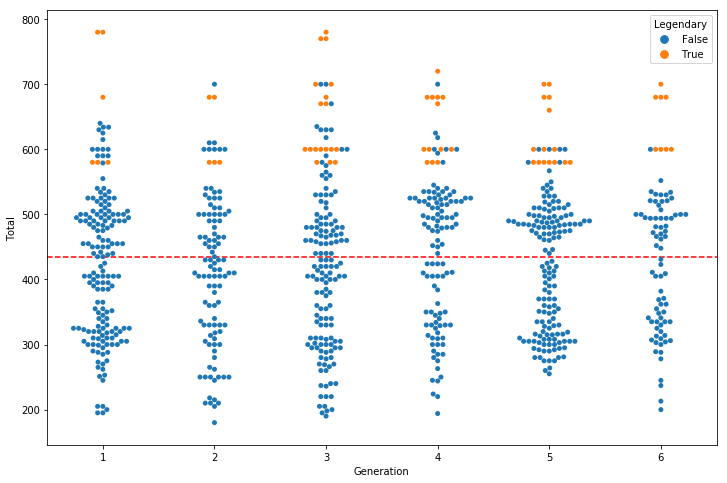

In [87]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
plot = sns.swarmplot(x="Generation", y="Total", hue="Legendary", data=df)
plt.axhline(df['Total'].mean(),color='red',linestyle='dashed')

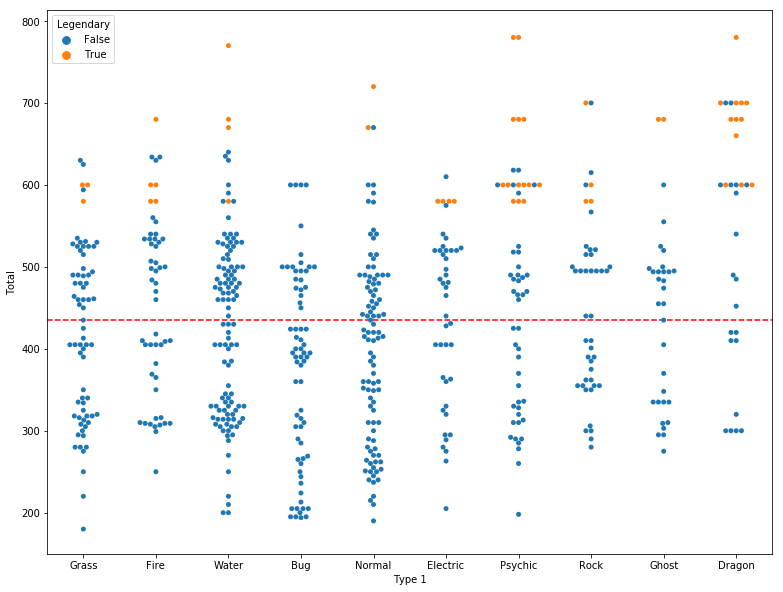

In [94]:
fig, ax = plt.subplots(1,1,figsize=(13,10))
top_types=df['Type 1'].value_counts()[:10] #take the top 10 Types
df1=df[df['Type 1'].isin(top_types.index)] #take the pokemons of the type with highest numbers, top 10
sns.swarmplot(x='Type 1',y='Total',data=df1,hue='Legendary') # this plot shows the points belonging to individual pokemons
# It is distributed by Type
plt.axhline(df1['Total'].mean(),color='red',linestyle='dashed')
plt.show()

In [11]:
x1 = df[df['Attack'] == max(df['Attack'])]
x2 = df[df['Defense'] == max(df['Defense'])]
x3 = df[df['HP'] == max(df['HP'])]
x4 = df[df['Speed'] == max(df['Speed'])]
x4 = df[df['Power'] == max(df['Power'])]
x4 = df[df['Total'] == max(df['Total'])]
df[df['Legendary']==True].head(3)

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Power,Overall,Total
#,,,,,,,,,,,,,,
157,Articuno,Ice,Flying,90,85,100,95,125,85,1,True,185,360,580
158,Zapdos,Electric,Flying,90,90,85,125,90,100,1,True,175,365,580
159,Moltres,Fire,Flying,90,100,90,125,85,90,1,True,190,370,580


In [12]:
#find count with word max
# ratio of legendary per generation
df.sort_values('Total',ascending=False).head(3)

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Power,Overall,Total
#,,,,,,,,,,,,,,
427,Mega Rayquaza,Dragon,Flying,105,180,100,180,100,115,3,True,280,500,780
165,Mega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,1,True,220,466,780
164,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True,290,526,780


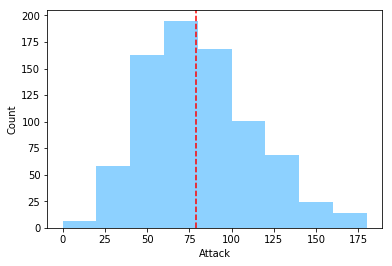

In [13]:
bins=range(0,200,20) #they act as containers
plt.hist(df["Attack"],bins,histtype="bar",rwidth=1.2,color='#8dd1ff') #hist() is used to plot a histogram
plt.xlabel('Attack') #set the xlabel name
plt.ylabel('Count') #set the ylabel name
plt.plot()
plt.axvline(df['Attack'].mean(),linestyle='dashed',color='red') #draw a vertical line showing the average Attack value
plt.show()

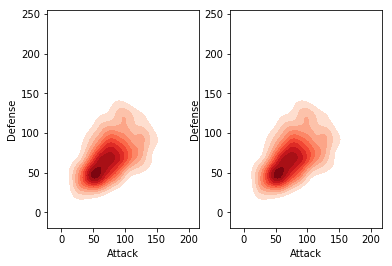

In [14]:
# Work on subplots

plt.subplot(1, 2, 1)
ax = sns.kdeplot(df['Attack'], df['Defense'],
             cmap="Reds", shade=True, shade_lowest=False)

plt.subplot(1, 2, 2)
ax = sns.kdeplot(df['Attack'], df['Defense'],
             cmap="Reds", shade=True, shade_lowest=False)


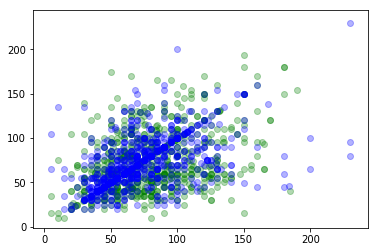

In [24]:
plt.scatter(df['Attack'],df['Sp. Atk'], alpha=.3, c='green')
plt.scatter(df['Defense'],df['Sp. Def'], alpha=.3, c='blue')

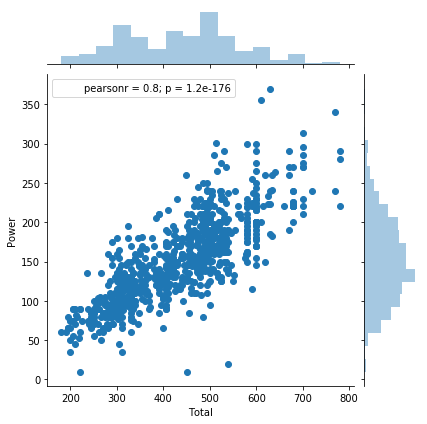

In [34]:
sns.jointplot(x="Total", y="Power", data=df);

/Users/d/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1.05,'Count of Pokemons per type 1')

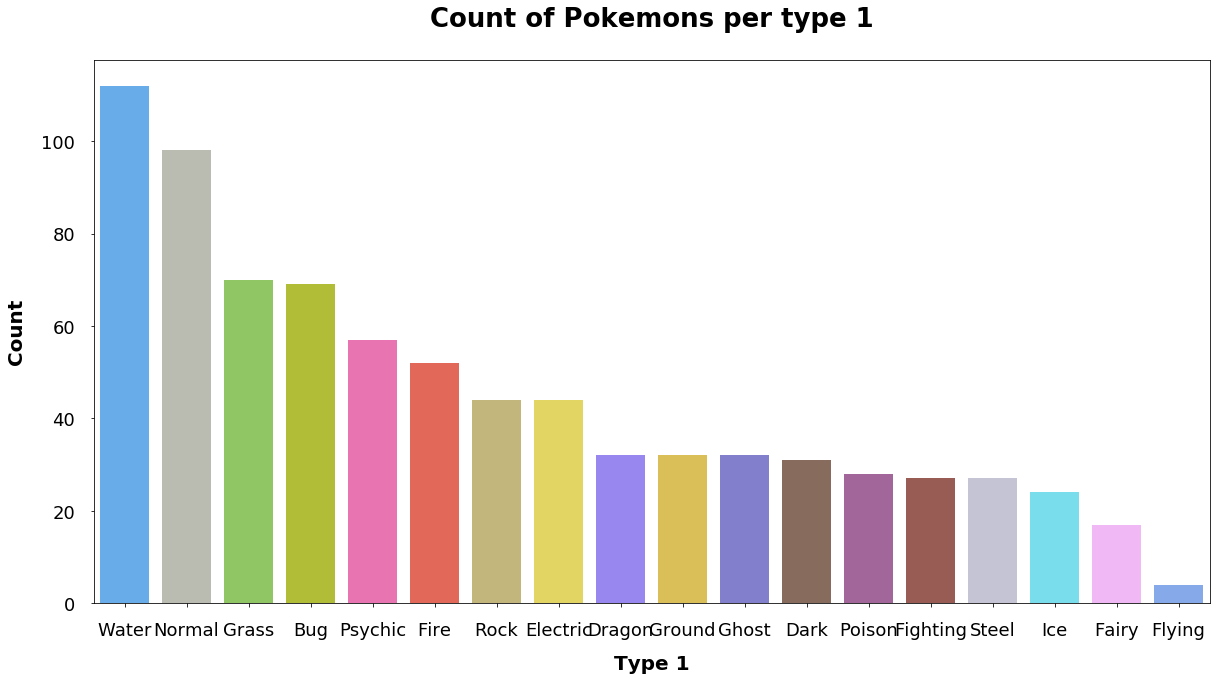

In [15]:
#make this a table
df1 = df['Type 1'].value_counts()

fig, ax = plt.subplots(1,1,figsize=(20,10))

sns.barplot(df1.index, df1.values, palette=pokemon_colors, ax=ax)

ax.tick_params(labelsize=18, direction='out', pad=15)
ax.set_xlabel('Type 1', weight='bold', size='20', labelpad=15)
ax.set_ylabel('Count', weight='bold', size='20', labelpad=15)
ax.set_title('Count of Pokemons per type 1',  size='26', weight='bold', y=1.05)
# pokemonTypes = pokemon[['#', 'Type 1']].groupby('Type 1').count()
# orderedTypes1 = pokemonTypes.sort_values('#').reset_index()['Type 1']

# sns.set(style="whitegrid")
# plt.figure(figsize=(12, 8))
# sns.countplot(y ='Type 1', data = pokemon, order=orderedTypes1, orient='h').set(ylabel='Pokemon Types', title = 'Count of Pokemon Types')

/Users/d/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1.05,'Count of Pokemons per type 2')

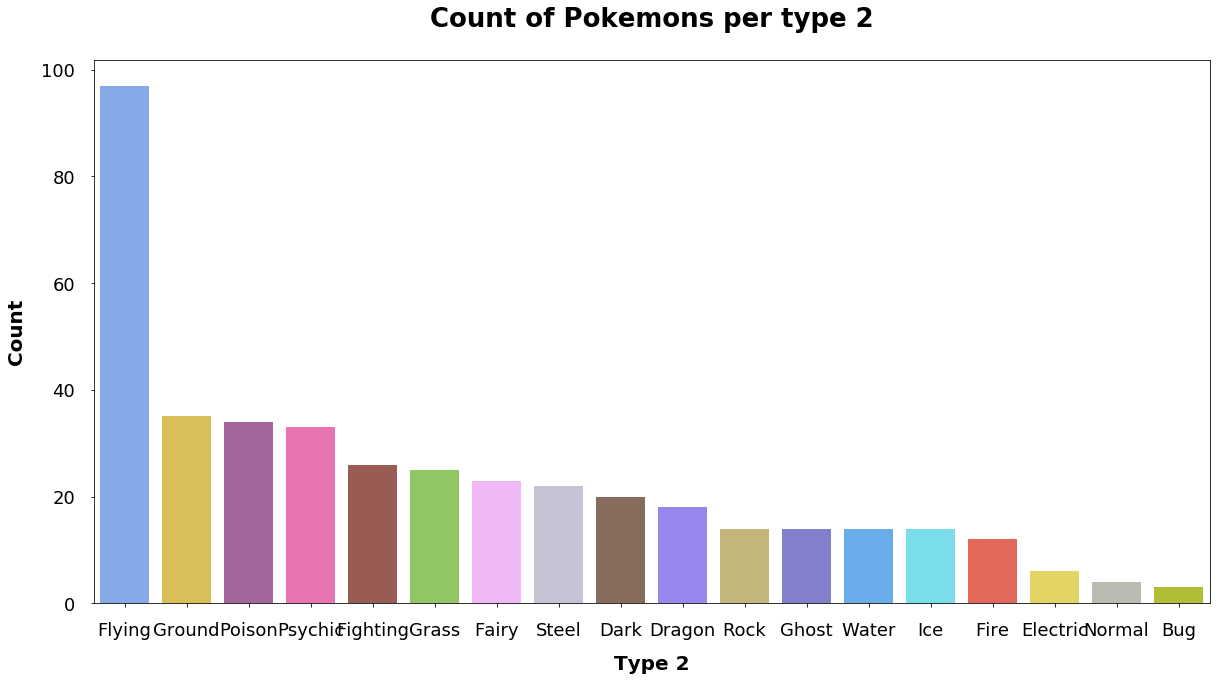

In [16]:
#make this a table
df1 = df['Type 2'].value_counts()

fig, ax = plt.subplots(1,1,figsize=(20,10))

sns.barplot(df1.index, df1.values, palette=pokemon_colors, ax=ax)

ax.tick_params(labelsize=18, direction='out', pad=15)
ax.set_xlabel('Type 2', weight='bold', size='20', labelpad=15)
ax.set_ylabel('Count', weight='bold', size='20', labelpad=15)
ax.set_title('Count of Pokemons per type 2',  size='26', weight='bold', y=1.05)
# pokemonTypes = pokemon[['#', 'Type 1']].groupby('Type 1').count()
# orderedTypes1 = pokemonTypes.sort_values('#').reset_index()['Type 1']

# sns.set(style="whitegrid")
# plt.figure(figsize=(12, 8))
# sns.countplot(y ='Type 1', data = pokemon, order=orderedTypes1, orient='h').set(ylabel='Pokemon Types', title = 'Count of Pokemon Types')

In [17]:
df['Type 2'].fillna(df['Type 1'], inplace=True)

/Users/d/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1.05,'Count of Pokemons per type 2(filled na)')

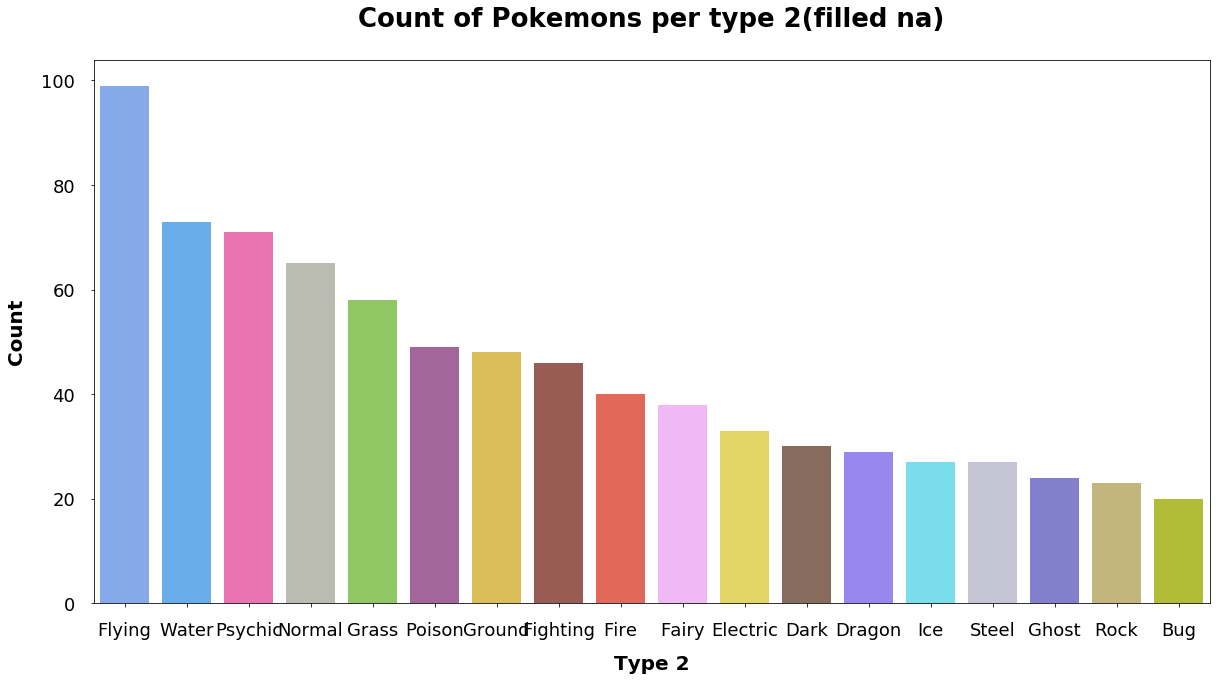

In [18]:
#make this a table
df1 = df['Type 2'].value_counts()

fig, ax = plt.subplots(1,1,figsize=(20,10))

sns.barplot(df1.index, df1.values, palette=pokemon_colors, ax=ax)

ax.tick_params(labelsize=18, direction='out', pad=15)
ax.set_xlabel('Type 2', weight='bold', size='20', labelpad=15)
ax.set_ylabel('Count', weight='bold', size='20', labelpad=15)
ax.set_title('Count of Pokemons per type 2(filled na)',  size='26', weight='bold', y=1.05)
# pokemonTypes = pokemon[['#', 'Type 1']].groupby('Type 1').count()
# orderedTypes1 = pokemonTypes.sort_values('#').reset_index()['Type 1']

# sns.set(style="whitegrid")
# plt.figure(figsize=(12, 8))
# sns.countplot(y ='Type 1', data = pokemon, order=orderedTypes1, orient='h').set(ylabel='Pokemon Types', title = 'Count of Pokemon Types')

/Users/d/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1.05,'Count of Pokemons types')

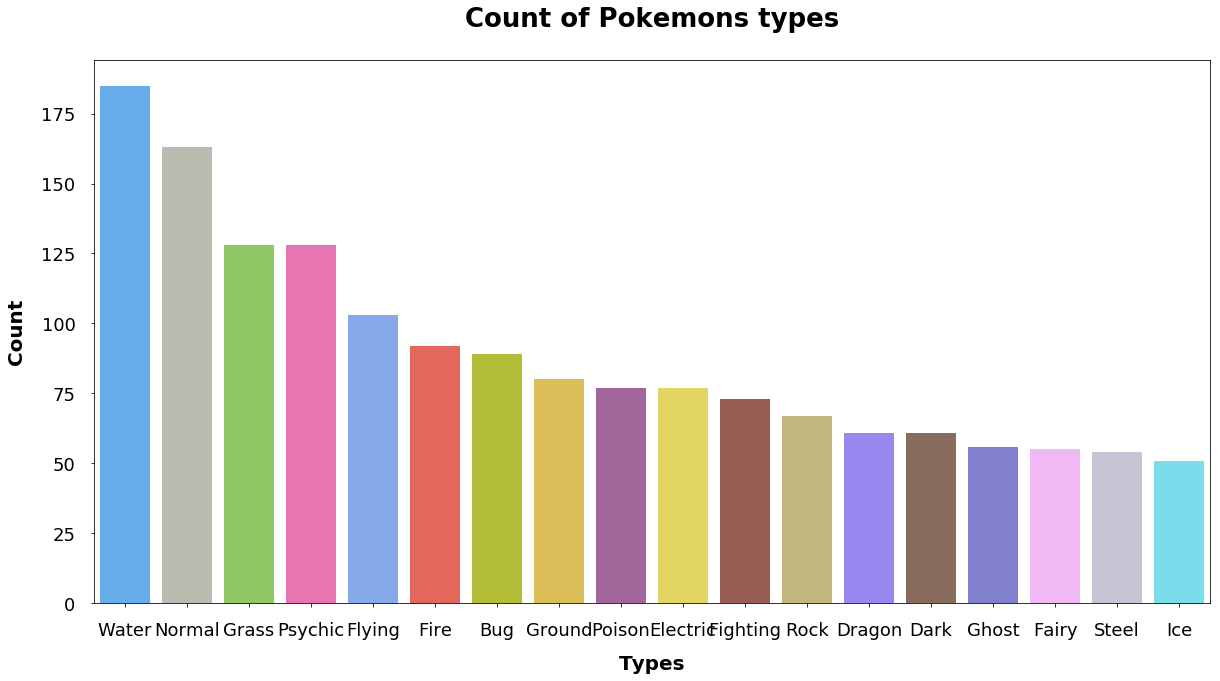

In [29]:
#make this a table
df1 = df['Type 2'].value_counts() + df['Type 1'].value_counts()
df1 = df1.sort_values(ascending=False)

fig, ax = plt.subplots(1,1,figsize=(20,10))

sns.barplot(df1.index, df1.values, palette=pokemon_colors, ax=ax)

ax.tick_params(labelsize=18, direction='out', pad=15)
ax.set_xlabel('Types', weight='bold', size='20', labelpad=15)
ax.set_ylabel('Count', weight='bold', size='20', labelpad=15)
ax.set_title('Count of Pokemons types',  size='26', weight='bold', y=1.05)
# pokemonTypes = pokemon[['#', 'Type 1']].groupby('Type 1').count()
# orderedTypes1 = pokemonTypes.sort_values('#').reset_index()['Type 1']

# sns.set(style="whitegrid")
# plt.figure(figsize=(12, 8))
# sns.countplot(y ='Type 1', data = pokemon, order=orderedTypes1, orient='h').set(ylabel='Pokemon Types', title = 'Count of Pokemon Types')

/Users/d/anaconda/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


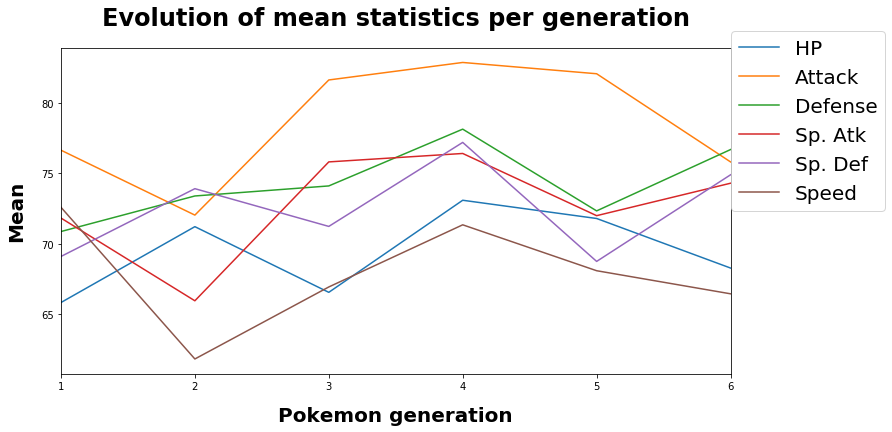

In [19]:
df1 = (df.groupby('Generation')
          .mean()
          .drop(['Power', 'Total', 'Overall', 'Legendary'], axis=1)
          .reset_index()
          .pipe(pd.melt, id_vars=['Generation'], 
                                var_name='statistic')
          .assign(unit=lambda df: 0))

fig, ax = plt.subplots(1,1,figsize=(12,6))

sns.tsplot(time='Generation', condition='statistic', 
           value='value', unit='unit', ax=ax,
           data=df1)

ax.set_xlabel('Pokemon generation', weight='bold', size='20', labelpad=15)
ax.set_ylabel('Mean', weight='bold', size='20', labelpad=15)
ax.set_title('Evolution of mean statistics per generation',  size='24', weight='bold', y=1.05)
ax.legend(loc=(1, 0.5), prop={'size': 20})

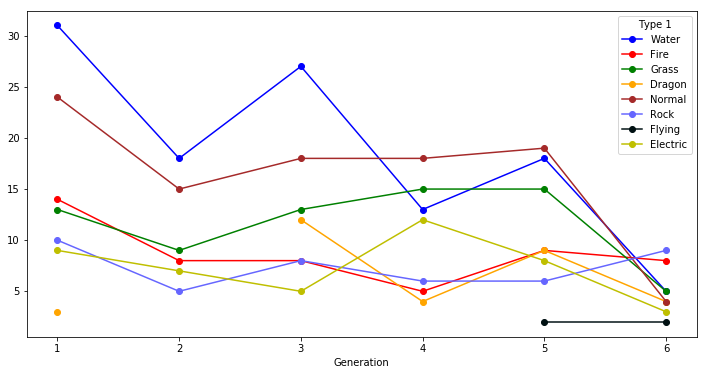

In [20]:
a=df.groupby(['Generation','Type 1']).count().reset_index()
a=a[['Generation','Type 1','Total']]
a=a.pivot('Generation','Type 1','Total')
a[['Water','Fire','Grass','Dragon','Normal','Rock','Flying','Electric']].plot(color=['b','r','g','#FFA500','brown','#6666ff','#001012','y'],marker='o')
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

In [ ]:
#radar | spider plot 

/Users/d/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/Users/d/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


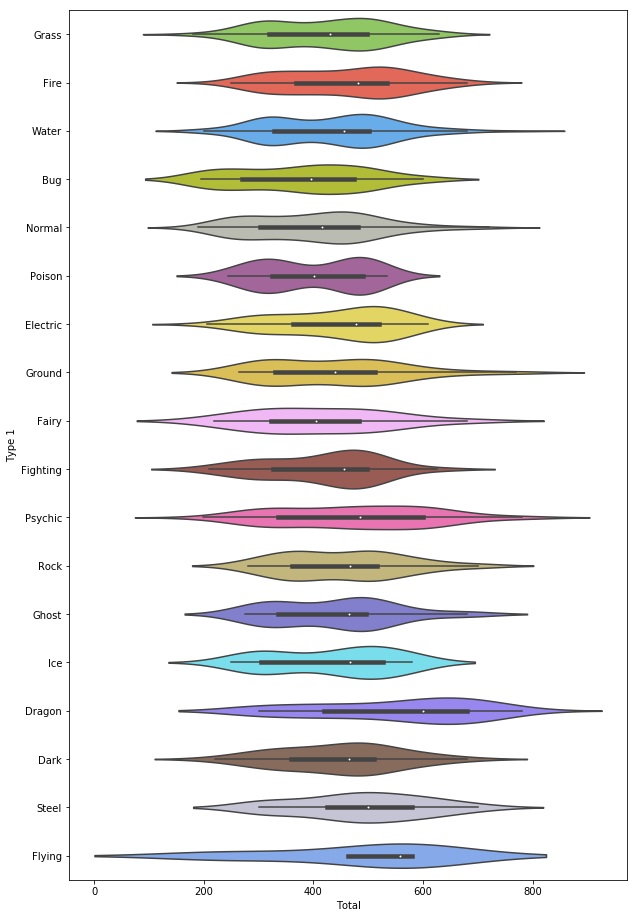

In [21]:
pokemonStats = df[['Type 1', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed','Total']]

plt.figure(figsize=(10, 16))
sns.violinplot(x='Total', y='Type 1', data = pokemonStats, orient = 'h', palette=pokemon_colors)

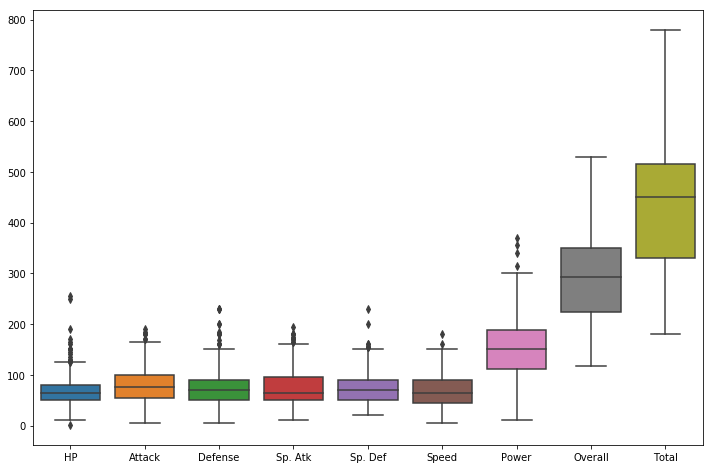

In [39]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
pkmn = df.drop(['Legendary', 'Generation'],1)
sns.boxplot(data=pkmn)

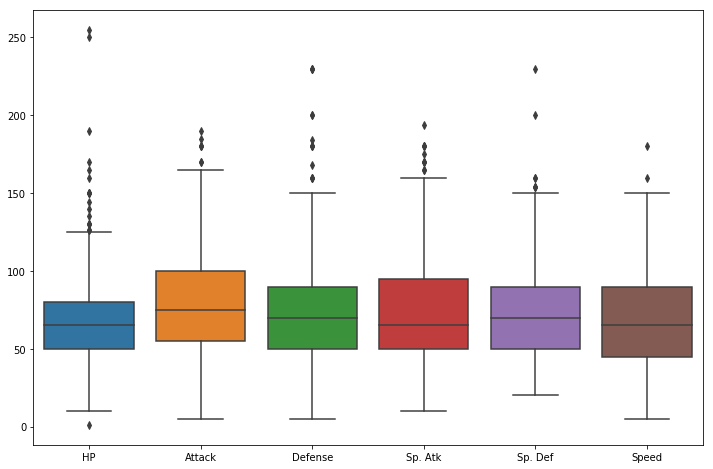

In [40]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
pkmn2 = pkmn.drop(['Power', 'Overall', 'Total'],1)
sns.boxplot(data=pkmn2)

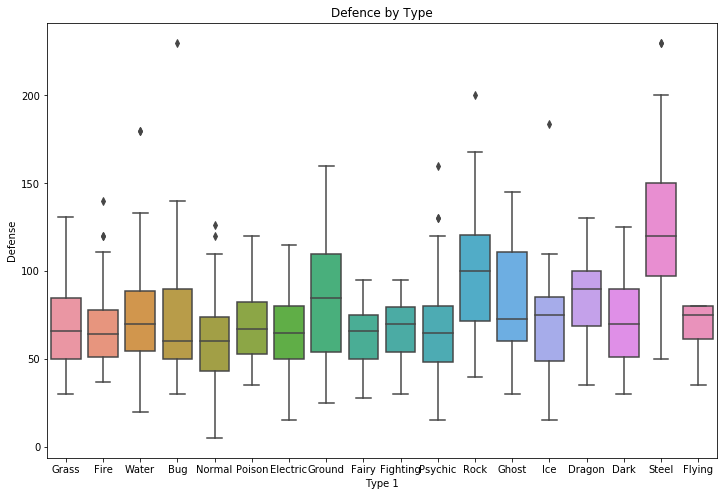

In [80]:
plt.subplots(figsize = (12,8))
plt.title('Defence by Type')
sns.boxplot(x = "Type 1", y = "Defense",data = df)
plt.show()

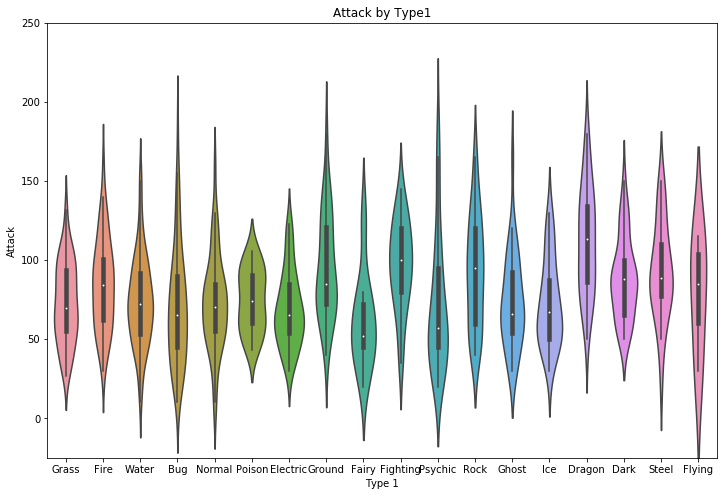

In [84]:
plt.subplots(figsize = (12,8))
plt.title('Attack by Type1')
sns.violinplot(x = "Type 1", y = "Attack",data = df)
plt.ylim(-25,250)
plt.show()

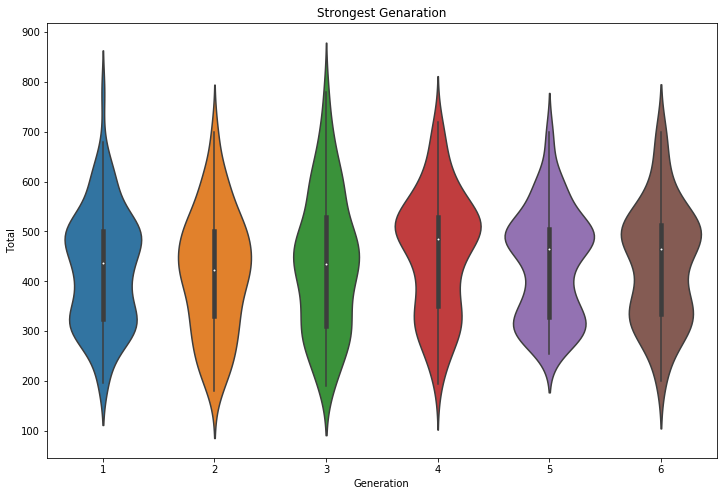

In [86]:
plt.subplots(figsize = (12,8))
plt.title('Strongest Genaration')
sns.violinplot(x = "Generation", y = "Total",data = df)
plt.show()

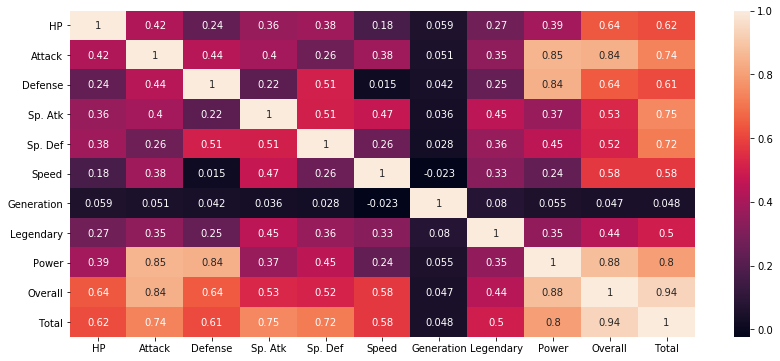

In [97]:
plt.figure(figsize=(14,6)) #manage the size of the plot
sns.heatmap(df.corr(),annot=True) #df.corr() makes a correlation matrix and sns.heatmap is used to show the correlations heatmap
plt.show()

Text(0.5,1.05,'Base Stats of Venusaur, Charizard and Blastoise')

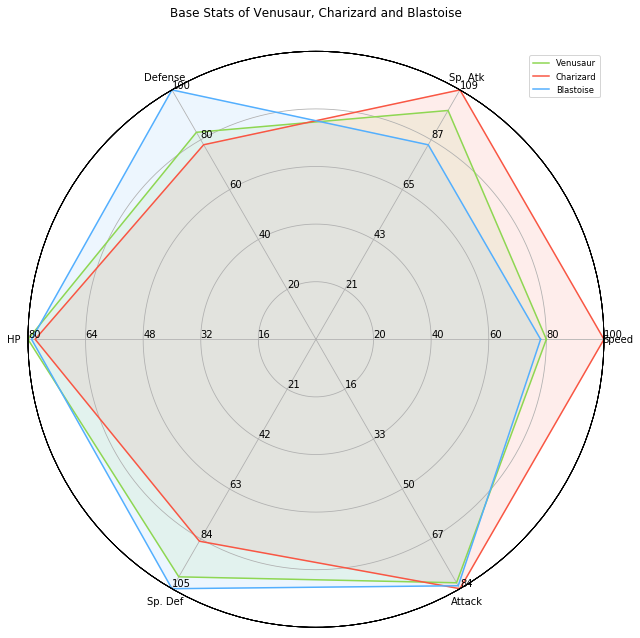

In [22]:
# Taken from https://www.kaggle.com/wenxuanchen/d/abcsds/pokemon/pokemon-visualization-radar-chart-t-sne

TYPE_LIST = ['Grass','Fire','Water','Bug','Normal','Poison',
            'Electric','Ground','Fairy','Fighting','Psychic',
            'Rock','Ghost','Ice','Dragon','Dark','Steel','Flying']

COLOR_LIST = ['#8ED752', '#F95643', '#53AFFE', '#C3D221', '#BBBDAF', '#AD5CA2', 
              '#F8E64E', '#F0CA42', '#F9AEFE', '#A35449', '#FB61B4', '#CDBD72', 
              '#7673DA', '#66EBFF', '#8B76FF', '#8E6856', '#C3C1D7', '#75A4F9']

# The colors are copied from this script: https://www.kaggle.com/ndrewgele/d/abcsds/pokemon/visualizing-pok-mon-stats-with-seaborn
# The colors look reasonable in this map: For example, Green for Grass, Red for Fire, Blue for Water...
COLOR_MAP = dict(zip(TYPE_LIST, COLOR_LIST))


# A radar chart example: http://datascience.stackexchange.com/questions/6084/how-do-i-create-a-complex-radar-chart
def _scale_data(data, ranges):
    (x1, x2), d = ranges[0], data[0]
    return [(d - y1) / (y2 - y1) * (x2 - x1) + x1 for d, (y1, y2) in zip(data, ranges)]

class RaderChart():
    def __init__(self, fig, variables, ranges, n_ordinate_levels = 6):
        angles = np.arange(0, 360, 360./len(variables))

        axes = [fig.add_axes([0.1,0.1,0.8,0.8],polar = True, label = "axes{}".format(i)) for i in range(len(variables))]
        _, text = axes[0].set_thetagrids(angles, labels = variables)
        
        for txt, angle in zip(text, angles):
            txt.set_rotation(angle - 90)
        
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)
            ax.grid('off')
        
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i], num = n_ordinate_levels)
            grid_label = ['']+[str(int(x)) for x in grid[1:]]
            ax.set_rgrids(grid, labels = grid_label, angle = angles[i])
            ax.set_ylim(*ranges[i])
        
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]

    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def legend(self, *args, **kw):
        self.ax.legend(*args, **kw)

# select display colors according to Pokemon's Type 1
def select_color(types):
    colors = [None] * len(types)
    used_colors = set()
    for i, t in enumerate(types):
        curr = COLOR_MAP[t]
        if curr not in used_colors:
            colors[i] = curr
            used_colors.add(curr)
    unused_colors = set(COLOR_LIST) - used_colors
    for i, c in enumerate(colors):
        if not c:
            try:
                colors[i] = unused_colors.pop()
            except:
                raise Exception('Attempt to visualize too many pokemons. No more colors available.')
    return colors

df = df

# In this order, 
# HP, Defense and Sp. Def will show on left; They represent defense abilities
# Speed, Attack and Sp. Atk will show on right; They represent attack abilities
# Attack and Defense, Sp. Atk and Sp. Def will show on opposite positions
use_attributes = ['Speed', 'Sp. Atk', 'Defense', 'HP', 'Sp. Def', 'Attack']
# choose the Pokemons you like
use_pokemons = ['Venusaur', 'Charizard', 'Blastoise']

df_plot = df[df['Name'].map(lambda x:x in use_pokemons)==True]
datas = df_plot[use_attributes].values 
ranges = [[2**-20, df_plot[attr].max()] for attr in use_attributes]
colors = select_color(df_plot['Type 1']) # select colors based on pokemon Type 1 

fig = plt.figure(figsize=(10, 10))
radar = RaderChart(fig, use_attributes, ranges)
for data, color, pokemon in zip(datas, colors, use_pokemons):
    radar.plot(data, color = color, label = pokemon)
    radar.fill(data, alpha = 0.1, color = color)
    radar.legend(loc = 1, fontsize = 'small')
plt.title('Base Stats of '+(', '.join(use_pokemons[:-1])+' and '+use_pokemons[-1] if len(use_pokemons)>1 else use_pokemons[0]))

In [23]:
whos

Variable         Type           Data/Info
-----------------------------------------
COLOR_LIST       list           n=18
COLOR_MAP        dict           n=18
RaderChart       type           <class '__main__.RaderChart'>
TYPE_LIST        list           n=18
a                DataFrame      Type 1       Bug  Dark  D<...>.0  \n6             5.0  
ax               AxesSubplot    AxesSubplot(0.125,0.125;0.775x0.755)
bins             range          range(0, 200, 20)
color            str            #53AFFE
colors           list           n=3
data             ndarray        6: 6 elems, type `int64`, 48 bytes
datas            ndarray        3x6: 18 elems, type `int64`, 144 bytes
df               DataFrame                             Na<...>\n[800 rows x 14 columns]
df1              DataFrame          Generation statistic <...>   Speed  66.439024     0
df_plot          DataFrame               Name Type 1  Typ<...>    183      340    530  
fig              Figure         Figure(720x720)
np        

In [25]:
df.head(4)

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Power,Overall,Total
#,,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,98,188,318
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,125,245,405
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,165,325,525
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,223,383,625


Text(0.5,1.05,'Base Stats of Bulbasaur, Ivysaur, Venusaur and Mega Venusaur')

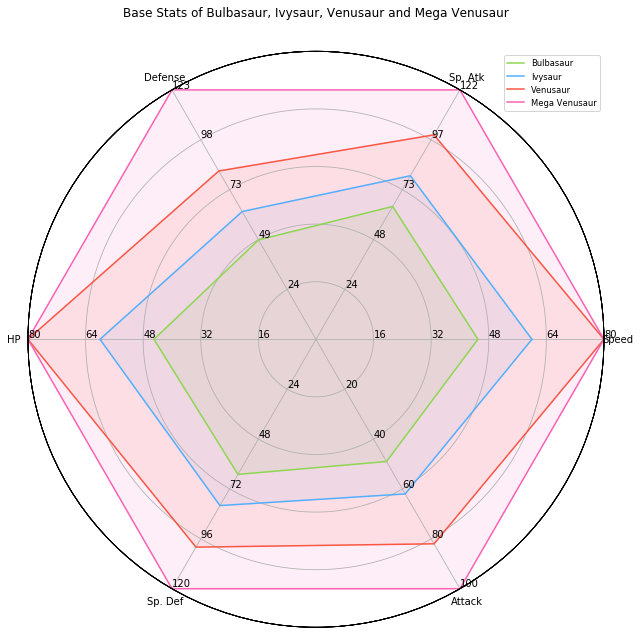

In [26]:
use_pokemons = ['Bulbasaur', 'Ivysaur', 'Venusaur','Mega Venusaur']

df_plot = df[df['Name'].map(lambda x:x in use_pokemons)==True]
datas = df_plot[use_attributes].values 
ranges = [[2**-20, df_plot[attr].max()] for attr in use_attributes]
colors = select_color(df_plot['Type 1']) # select colors based on pokemon Type 1 

fig = plt.figure(figsize=(10, 10))
radar = RaderChart(fig, use_attributes, ranges)
for data, color, pokemon in zip(datas, colors, use_pokemons):
    radar.plot(data, color = color, label = pokemon)
    radar.fill(data, alpha = 0.1, color = color)
    radar.legend(loc = 1, fontsize = 'small')
plt.title('Base Stats of '+(', '.join(use_pokemons[:-1])+' and '+use_pokemons[-1] if len(use_pokemons)>1 else use_pokemons[0]))

In [28]:
df.tail(10)

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Power,Overall,Total
#,,,,,,,,,,,,,,
791,Noibat,Flying,Dragon,40,30,35,45,40,55,6,False,65,160,245
792,Noivern,Flying,Dragon,85,70,80,97,80,123,6,False,150,358,535
793,Xerneas,Fairy,Fairy,126,131,95,131,98,99,6,True,226,451,680
794,Yveltal,Dark,Flying,126,131,95,131,98,99,6,True,226,451,680
795,Zygarde Half Forme,Dragon,Ground,108,100,121,81,95,95,6,True,221,424,600
796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,250,350,600
797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,270,430,700
798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,170,320,600
799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,220,380,680
